In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize
import calendar as cal
# import warnings
# warnings.filterwarnings('ignore')

# Анализ метеонаблюдений от Королевского нидерландского метеорологического института (KNMI) за последние 100 лет (1920 — 2020 гг.)

В данном проекте используется [набор данных](https://www.kaggle.com/davidzaccai/knmi-19012020-historical-weather-data) наблюдений за погодой от Королевского нидерландского метеорологического института ([Koninklijk Nederlands Meteorologisch Instituut — KNMI](https://www.knmi.nl/)) с более чем столетними измерениями, начиная с 1901 года! Наблюдения производились метеостанцией в Де-Билт (De Bilt), где находится штаб-квартира KNMI, и охватывают данные о температуре, ветре, относительной влажности, облачности, осадках, испарении, продолжительности солнечного сияния и атмосферном давлении.

In [2]:
# прочитать заголовок
header = tuple(np.loadtxt("KNMI_20200710.csv", dtype=str, delimiter = ',', max_rows=1))
print(header)

('STN', 'YYYYMMDD', 'DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24')


| Столбец | Описание | Примечание |
|:---:|:---|:---:|
| STN | Номер станции | 260 = De Bilt, NL |
| YYYYMMDD | Дата | YYYY=год, MM=месяц, DD=день |
| DDVEC | Направление ветра (в градусах) | 360=север, 90=восток, 180=юг, 270=запад, 0=штиль |
| FHVEC | Скорость ветра: среднее значение вектора | [км/ч] |
| FG | Скорость ветра: среднее за 24 часа | [км/ч] |
| FHX | Скорость ветра: наивысшее среднечасовое значение | [км/ч] |
| FHXH | Скорость ветра: метка времени (час измерения) FHX | [0-23] |
| FHN | Скорость ветра: наименьшее среднечасовое значение | [км/ч] |
| FHNH | Скорость ветра: метка времени (час измерения) FHN | [0-23] |
| FXX | Скорость ветра: максимальный порыв ветра | [км/ч] |
| FXXH | Скорость ветра: метка времени (час измерения) FXX | [0-23] |
| TG | Температура: среднее за 24 часа | [℃] |
| TN | Температура: минимум | [℃] |
| TNH | Температура: метка времени (час измерения) TN | [0-23] |
| TX | Температура: максимум | [℃] |
| TXH | Температура: метка времени (час измерения) TX | [0-23] |
| T10N | Температура: минимальная температура на высоте 10 см над уровнем земли | [℃] |
| T10NH | Температура: метка времени (час измерения) T10N | [0-23] |
| SQ | Продолжительность солнечного света, рассчитанная с использованием глобального излучения | [ч] |
| SP | Процент продолжительности солнечного света по отношению к максимально возможному дневному солнечному свету | [0-100] |
| Q | Глобальное излучение | [Дж/см2] |
| DR | Осадки: продолжительность | [ч] |
| RH | Осадки: суммарное за 24 часа | [мм] |
| RHX | Осадки: максимум за час | [мм] |
| RHXH | Осадки: метка времени (час измерения) RHX | [0-23] |
| PG | Атмосферное давление (пониженное до уровня моря): среднее за 24 ч | [даПа] |
| PX | Атмосферное давление (пониженное до уровня моря): максимум | [даПа] |
| PXH | Атмосферное давление (пониженное до уровня моря): метка времени (час измерения) PX | [0-23] |
| PN | Атмосферное давление (пониженное до уровня моря): минимум | [даПа] |
| PNH | Атмосферное давление (пониженное до уровня моря): метка времени (час измерения) PN | [0-23] |
| VVN | Видимость: минимум | 0: <100 m, 1:100-200 m, 2:200-300 m, 49:4900-5000 m, 50:5-6 km, 56:6-7 km, 57:7-8 km, 79:29-30 km, 80:30-35 km, 81:35-40 km, 89: >70 km |
| VVNH | Видимость: метка времени (час измерения) VVN | [0-23] |
| VVX | Видимость: максимум | 0: <100 m, 1:100-200 m, 2:200-300 m, 49:4900-5000 m, 50:5-6 km, 56:6-7 km, 57:7-8 km, 79:29-30 km, 80:30-35 km, 81:35-40 km, 89: >70 km |
| VVXH | Видимость: метка времени (час измерения) VVX | [0-23] |
| NG | Облачность: среднее за 24 часа | [0-8] (0 = небо ясное, 8 = небо закрыто) |
| UG | Относительная влажность: среднее за 24 часа | [%] |
| UX | Относительная влажность: максимум | [%] |
| UXH | Относительная влажность: метка времени (час измерения) UX | [0-23] |
| UN | Относительная влажность: минимум | [%] |
| UNH | Относительная влажность: метка времени (час измерения) UN | [0-23] |
| EV24 | Испарение Маккинка | [мм] |

In [3]:
str2float = lambda s: float(s.strip() or 0)  # заменить отсутствующие данные нулём
str2int = lambda s: int(s.strip() or 0)  # заменить отсутствующие данные нулём

casts = {i: str2float for i in range(len(header))}
formats = ['f4' for i in range(len(header))]

for cln in header:
    if (cln == 'STN'):
        i = header.index(cln)
        casts[i] = str2int
        formats[i] = 'i4'
    elif (cln == 'YYYYMMDD'):
        i = header.index(cln)
        casts[i] = str2int
        formats[i] = 'i4'
    elif (cln.endswith('H')):
        i = header.index(cln)
        casts[i] = str2int
        formats[i] = 'i1'

# загрузить данные
data = tuple(np.loadtxt("KNMI_20200710.csv", delimiter = ',', skiprows=1, converters=casts,
                        dtype={'names': header, 'formats': formats}))
YEARS = (1920, 2020)
# отбросить данные вне исследуемого диапазона
i0 = data.index(next(filter(lambda rec: rec[header.index("YYYYMMDD")] >= (YEARS[0]*10000), data)))
i1 = data.index(next(filter(lambda rec: rec[header.index("YYYYMMDD")] > (YEARS[1]*10000), data)))
data = data[i0:i1]

K = 0.0750064  # коэффициент для перевода в мм рт.ст.

---

Рассмотрим среднесуточное давление на уровне моря (в 0,1 гПа), рассчитанное на основе 24-часовых значений. Это включает в себя печать описательной статистики и визуализацию распределения вероятностей. В природе мы часто имеем дело с нормальным распределением, поэтому нам пригодится проверка гипотезы о нормальном законе распределения генеральной совокупности. 

In [4]:
# получить средние значения атмосферного давления
meanp = np.array([K * rec[header.index("PG")] for rec in data])

In [5]:
# отфильтровать нулевые значения
meanp = meanp[meanp > 0]

In [6]:
# описательная статистика для атмосферного давления
mean = meanp.mean()
std = meanp.std()

print("Максимум:\t\t", meanp.max())
print("Минимум:\t\t", meanp.min())
print("Выборочное среднее:\t", mean)
print("Медиана:\t\t", np.median(meanp))
print("Mода:\t\t\t", stats.mode(meanp, axis=None))
print("Стандартное отклонение:\t", std)

Максимум:		 786.2920912
Минимум:		 721.6365744
Выборочное среднее:	 761.46796689531
Медиана:		 761.9150112
Mода:			 ModeResult(mode=array([760.6399024]), count=array([181]))
Стандартное отклонение:	 7.3647677399145515


Text(0, 0.5, 'Частота')

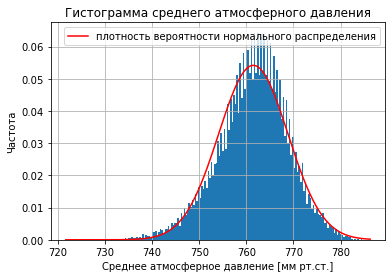

In [7]:
# гистограмма выборки и плотность вероятности нормального распределения
plt.title("Гистограмма среднего атмосферного давления")
_, bins, _ = plt.hist(meanp, int(np.sqrt(len(meanp))), density=True)  # normed=True
bbb = np.array([1/(std * np.sqrt(2 * np.pi)) * np.exp(- (b - mean)**2/(2 * std**2)) for b in bins])
plt.plot(bins, bbb, 'r-', label="плотность вероятности нормального распределения")
plt.grid()
plt.legend(loc='best')
plt.xlabel("Среднее атмосферное давление [мм рт.ст.]")
plt.ylabel("Частота")

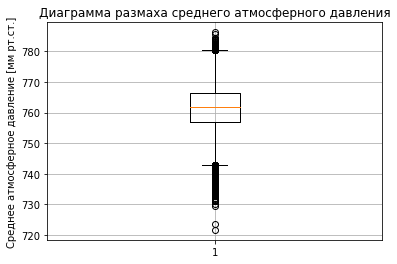

In [8]:
# "ящик с усами"
plt.boxplot(meanp)
plt.title("Диаграмма размаха среднего атмосферного давления")
plt.ylabel("Среднее атмосферное давление [мм рт.ст.]")
plt.grid()

---

Дневной диапазон давления — это разница дневных максимумов и минимумов. В реальных данных иногда отсутствуют некоторые значения. В данном случае это значения для высокого и/или низкого давления в данный день. Можно восполнить эти пробелы с помощью умного алгоритма (интерполировать). Однако можно сделать проще и просто их проигнорировать. После вычисления диапазонов мы проведём аналогичный анализ, как в ячейках выше, но мы будем использовать функции, которые могут работать со значениями NaN. Также мы рассмотрим связь между месяцами и диапазонами.

In [9]:
# получить значения атмосферного давления
highs = np.array([K * rec[header.index("PX")] for rec in data]).astype(float)
lows = np.array([K * rec[header.index("PN")] for rec in data]).astype(float)

In [10]:
# отфильтровать нулевые значения (заменить на NaN)
highs[highs == 0] = np.nan
lows[lows == 0] = np.nan

In [11]:
# вычислить диапазон и статистику
ranges = highs - lows
print("Минимум суточного диапазона  :", np.nanmin(ranges))
print("Максимум суточного диапазона :", np.nanmax(ranges))
print("Среднее суточного диапазона  :", np.nanmean(ranges))
print("Стандартное отклонение:", np.nanstd(ranges))

Минимум суточного диапазона  : 0.3000256000000263
Максимум суточного диапазона : 31.277668800000015
Среднее суточного диапазона  : 4.587461245152635
Стандартное отклонение: 3.2866300273332447


In [12]:
# получить статистику по месяцам
dates = np.array([rec[header.index("YYYYMMDD")] for rec in data])
months = (dates % 10000) // 100
months = months[~np.isnan(ranges)]  # игнорировать NaN-значения

monthly = []
month_range = np.arange(1, 13)

for month in month_range:
    indices = np.where(month == months)
    monthly.append(np.nanmean(ranges[indices]))

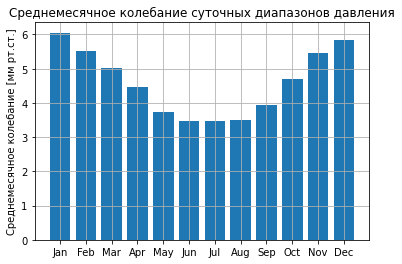

In [13]:
# гистограмма среднемесячных колебаний суточных диапазонов давления
plt.bar(month_range, monthly)
plt.title("Среднемесячное колебание суточных диапазонов давления")
plt.xticks(month_range, cal.month_abbr[1:13])
plt.ylabel("Среднемесячное колебание [мм рт.ст.]")
plt.grid()

Мы проанализировали суточные диапазоны атмосферного давления. Далее мы визуализировали среднемесячные колебания суточного диапазона. Похоже, что существует закономерность, приводящая к меньшим диапазонам суточного атмосферного давления летом.

---

Согласно теории о глобальном потеплении температура на Земле неуклонно растёт с каждым годом. Поскольку давление является ещё одной термодинамической переменной, мы можем ожидать, что давление также будет следовать этой тенденции.

In [14]:
# получить значения атмосферного давления
avgs = np.array([K * rec[header.index("PG")] for rec in data]).astype(float)
highs = np.array([K * rec[header.index("PX")] for rec in data]).astype(float)
lows = np.array([K * rec[header.index("PN")] for rec in data]).astype(float)

In [15]:
# отфильтровать нулевые значения (с помощью маскированных массивов NumPy)
avgs = np.ma.array(avgs, mask=(avgs == 0))
lows = np.ma.array(lows, mask=(lows == 0))
highs = np.ma.array(highs, mask=(highs == 0))

In [16]:
# годы наблюдений 
years = dates // 10000

In [17]:
# инициализировать массивы годовой статистики
y_range = np.arange(YEARS[0], YEARS[1])
nyears = len(y_range)
y_avgs = np.zeros(nyears)
y_highs = np.zeros(nyears)
y_lows = np.zeros(nyears)

In [18]:
# вычислить статистику
for year in y_range:
    indices = np.where(year == years)
    y_avgs[year - y_range[0]] = np.mean(avgs[indices])
    y_highs[year - y_range[0]] = np.max(highs[indices])
    y_lows[year - y_range[0]] = np.min(lows[indices])

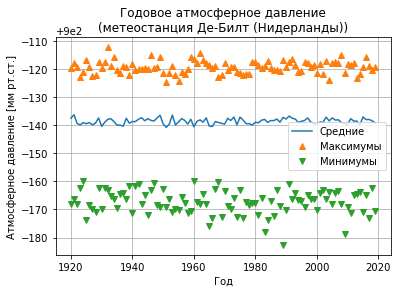

In [19]:
plt.title("Годовое атмосферное давление\n(метеостанция Де-Билт (Нидерланды))")
plt.ticklabel_format(useOffset=900, axis='y')

plt.plot(y_range, y_avgs, label="Средние")

# график без учёта NaN-значений
h_mask = np.isfinite(y_highs)
plt.plot(y_range[h_mask], y_highs[h_mask], '^', label="Максимумы")

l_mask = np.isfinite(y_lows)
plt.plot(y_range[l_mask], y_lows[l_mask], 'v', label="Минимумы")

plt.xlabel("Год")
plt.ylabel("Атмосферное давление [мм рт.ст.]")
plt.grid()
plt.legend(loc='best')

Среднегодовое давление кажется ровным или немного колеблющимся, но без какой-либо тенденции к росту.

---

Рассмотрим теперь такую характеристику как видимость.

Видимость здесь — дискретная переменная, поэтому усреднение значений может не иметь смысла. Кроме того, беглый взгляд на данные показывает, что у нас есть много значений 0 для периода между 1901 и 1950 годами почти каждый день. Вряд ли Де-Билт был особенно туманным в тот период. Определим туман как видимость между 1 и 2 км (значения 10 и 20 в файле данных), а дымку — как видимость между 2 и 5 км (значения 20 и 50 в файле данных).

Загрязнение воздуха может ухудшить видимость, особенно в ясные дни. Мы можем определить ясные дни как дни с видимостью более 30 км или значение 79 в файле данных. В идеале мы должны использовать данные о загрязнении воздуха, но, к сожалению, у нас их нет.  Интересно узнать количество ясных дней в году.

In [20]:
# получить значения максимальной видимости
visibility = np.array([rec[header.index("VVX")] for rec in data]).astype(float)

In [21]:
# день года
doy = dates % 10000
doy_range = np.unique(doy)

ndoy = len(doy_range)
mist = np.zeros(ndoy)
haze = np.zeros(ndoy)

In [22]:
# вычислить частоты
for i, d in enumerate(doy_range):
    indices = np.where(d == doy)
    selection = visibility[indices]

    mist_truth = (10 < selection) & (selection < 20)
    mist[i] = len(selection[mist_truth]) / (1. * len(selection))

    haze_truth = (20 < selection) & (selection < 50)
    haze[i] = len(selection[haze_truth]) / (1. * len(selection))

In [23]:
# годы наблюдений 
years = dates // 10000

In [24]:
# инициализировать массивы годовой статистики
y_range = np.arange(YEARS[0], YEARS[1])
nyears = len(y_range)
y_counts = np.zeros(nyears)

In [25]:
# получить годовые подсчёты
for year in y_range:
    indices = np.where(year == years)
    selection = visibility[indices]
    y_counts[year - y_range[0]] = len(selection[selection > 79])

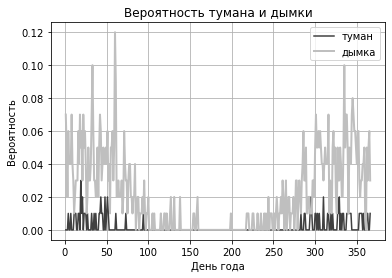

In [26]:
plt.plot(np.arange(1, 367), mist, color='0.25', label="туман")
plt.plot(np.arange(1, 367), haze, color='0.75', label="дымка", lw=2)
plt.title("Вероятность тумана и дымки")
plt.xlabel("День года")
plt.ylabel("Вероятность")
plt.grid()
plt.legend(loc='best')

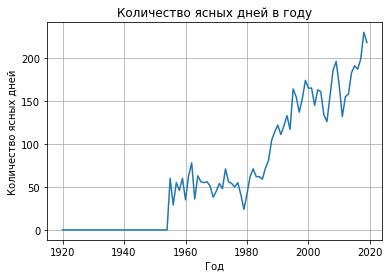

In [27]:
plt.plot(y_range, y_counts)
plt.xlabel("Год")
plt.ylabel("Количество ясных дней")
plt.title("Количество ясных дней в году")
plt.grid()

Как видите, ясные дни начинают появляться только после 1950 года. Это происходит не из-за очень туманной погоды до 1950 года, а из-за явления отсутствия или недействительности данных. После 1980 года мы видим явный рост количества ясных дней. Предполагается, что это период, когда глобальное потепление и изменение климата также усилились. Похоже, что туман обычно бывает в первые и последние два месяца года. Аналогичные выводы можно сделать и о дымке, причём дымка более вероятна, чем туман.

---

Очень простая прогностическая модель берёт текущее значение переменной и экстраполирует его на следующий период. Для экстраполяции мы можем использовать простую математическую функцию. В качестве самой простой зависимости между переменными используется линейная функция, а соответствующая модель носит название линейной регрессии.

In [28]:
x = np.array([K * rec[header.index("PG")] for rec in data])
y = np.array([rec[header.index("RH")] for rec in data])

ok = [(x[i] > 0) and (y[i] > 0) for i in range(len(x))]
x = x[ok]
y = y[ok]

In [29]:
# ковариация
cov = np.cov(x, y, ddof=0)
print(cov)
# коэффициент корреляции Пирсона
rXY = np.corrcoef(x, y)
print(rXY)

[[ 52.20424106 -76.93847717]
 [-76.93847717 949.31143476]]
[[ 1.         -0.34561003]
 [-0.34561003  1.        ]]


In [30]:
# расчёт коэффициентов линейной регрессии с помощью формул для парной регрессии
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
print(f"{b0=} {b1=}")

b0=1147.7643981072865 b1=-1.4737974464127084


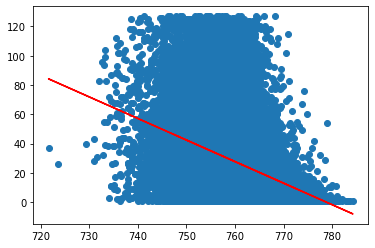

In [31]:
ox = x
oy = b0 + b1 * ox
plt.scatter(x, y)
plt.plot(ox, oy, color='red')

In [32]:
z = b0 + b1 * x
R2 = z.var() / y.var()
print(f"Коэффициент детерминации: {R2=}")
print(np.corrcoef(x, y) ** 2)
mae = np.abs((y - z) / y).mean()
print(f"Средняя ошибка аппроксимации: {mae}")

Коэффициент детерминации: R2=0.1194462923675665
[[1.         0.11944629]
 [0.11944629 1.        ]]
Средняя ошибка аппроксимации: 4.330099545963539


In [33]:
alpha = 0.05 # уровень значимости
n = len(meanp) # число наблюдений
k = 1 # число факторов
k1 = k
k2 = n - k - 1
F = (R2 / (1 - R2)) * (k2 / k1)
Fc = stats.f.ppf(1 - alpha, k1, k2)
if (F > Fc):
    print(f"{F=} > {Fc=} -> уравнение регрессии статистически значимо")
else:
    print(f"{F=} < {Fc=} -> уравнение регрессии статистически незначимо")

F=4954.311018541154 > Fc=3.8417134435260576 -> уравнение регрессии статистически значимо


In [34]:
alpha = 0.05 # уровень значимости

# стандартная ошибка коэффициента наклона
s_slope = np.sqrt((((y - z) ** 2).sum() / (n - 2)) / (((x - x.mean()) ** 2).sum()))
print(f"Стандартная ошибка коэффициента наклона: {s_slope=}")
T = b1 / s_slope
Tc = stats.t.ppf(1-alpha/2, n-2)
if (abs(T) < Tc):
    print(f"|{T=}| < {Tc=} -> гипотеза H0 (b1 = 0) принимается => b1 незначим")
else:
    print(f"|{T=}| > {Tc=} -> гипотеза H0 (b1 = 0) отвергается => b1 значим")
    print("Доверительный интервал для параметра b1: (%f, %f)" % (b1 - Tc * s_slope, b1 + Tc * s_slope))

# стандартная ошибка коэффициента сдвига
s_intercept = s_slope * np.sqrt((x ** 2).mean())
print(f"Стандартная ошибка коэффициента сдвига: {s_intercept=}")
T = b0 / s_intercept
Tc = stats.t.ppf(1-alpha/2, n-2)
if (abs(T) < Tc):
    print(f"|{T=}| < {Tc=} -> гипотеза H0 (b0 = 0) принимается => b0 незначим")
else:
    print(f"|{T=}| > {Tc=} -> гипотеза H0 (b0 = 0) отвергается => b0 значим")
    print("Доверительный интервал для параметра b0: (%f, %f)" % (b0 - Tc * s_intercept, b0 + Tc * s_intercept))

Стандартная ошибка коэффициента наклона: s_slope=0.02093852892341572
|T=-70.38686680440807| > Tc=1.9600289394592074 -> гипотеза H0 (b1 = 0) отвергается => b1 значим
Доверительный интервал для параметра b1: (-1.514838, -1.432757)
Стандартная ошибка коэффициента сдвига: s_intercept=15.894037676784986
|T=72.2135193993987| > Tc=1.9600289394592074 -> гипотеза H0 (b0 = 0) отвергается => b0 значим
Доверительный интервал для параметра b0: (1116.611624, 1178.917172)


Хорошо известен тот факт, что высокое атмосферное давление означает ясную погоду без осадков и безоблачное небо.

Коэффициент корреляции близок к -0.5, значит между атмосферным давлением и осадками существует обратная связь, но она слабая. 

Но мы сравнивали *средние значения за сутки* обоих показателей. А для прогноза погоды используются *мгновенные (актуальные в данный момент) значения*. К тому же низкое атмосферное давление обещает, что будут осадки, но никоим образом не говорит об их интенсивности (морось / дождь / ливень).

---

Простой способ смоделировать атмосферное давление — предположить, что значения колеблются вокруг среднего $μ$. Затем мы предполагаем, что в простейшем случае отклонения последовательных значений $ε$ от среднего удовлетворяют уравнению:

$$P_t=μ+ε_t+θε_{t-1}$$

Связь линейная, и в простейшем случае нам нужно оценить только один параметр — θ.

In [35]:
# получить средние значения атмосферного давления
meanp = np.array([K * rec[header.index("PG")] for rec in data])

cutoff = int(0.9 * len(meanp))

In [36]:
model = lambda p, ma1: p * ma1
error = lambda p, t, ma1: t - model(p, ma1)

In [37]:
# модель скользящего среднего
p0 = [0.9]  # начальное предположение
mu = meanp[:cutoff].mean()
params = optimize.leastsq(error, p0, args=(meanp[1:cutoff] - mu, meanp[:cutoff-1] - mu))[0]
print(params)

[0.81561529]


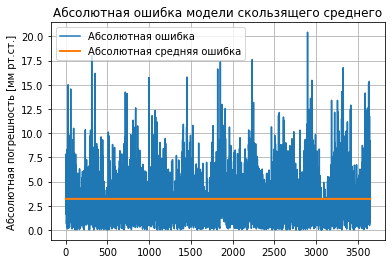

In [38]:
abs_error = np.abs(error(params, meanp[cutoff+1:] - mu, meanp[cutoff:-1] - mu))
plt.plot(abs_error, label="Абсолютная ошибка")
plt.plot(np.full_like(abs_error, abs_error.mean()), lw=2, label="Абсолютная средняя ошибка")
plt.title("Абсолютная ошибка модели скользящего среднего")
plt.ylabel("Абсолютная погрешность [мм рт.ст.]")
plt.grid()
plt.legend(loc='best')

---

Интересно исследовать атмосферное давление в течение года. В частности, может быть информативным проверка закономерностей, связанных с изменчивостью и, следовательно, предсказуемостью. Причина в том, что атмосферное давление в отдельные месяцы может сильно колебаться, что снижает предсказуемость. Мы построим ежемесячные диаграммы размаха и месячную дисперсию атмосферного давления.

In [39]:
# получить средние значения атмосферного давления
meanp = np.array([K * rec[header.index("PG")] for rec in data])

In [40]:
# получить статистику по месяцам
dates = np.array([rec[header.index("YYYYMMDD")] for rec in data])
months = (dates % 10000) // 100

monthly = []
vars = np.zeros(12)
month_range = np.arange(1, 13)

for month in month_range:
    indices = np.where(month == months)
    selection = meanp[indices]

    # отфильтровать нулевые значения
    selection = selection[selection > 0]

    monthly.append(selection)
    vars[month - 1] = np.var(selection)

Text(0, 0.5, 'Атмосферное давление [мм рт.ст.]')

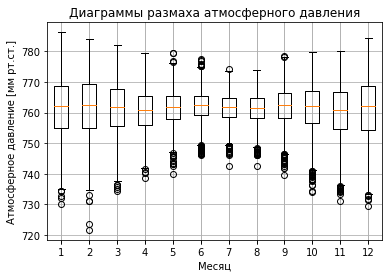

In [41]:
# диаграммы размаха атмосферного давления
plt.xticks(month_range, cal.month_abbr[1:13])
plt.grid()
plt.xlabel("Месяц")
plt.title("Диаграммы размаха атмосферного давления")
plt.boxplot(monthly)
plt.ylabel("Атмосферное давление [мм рт.ст.]")

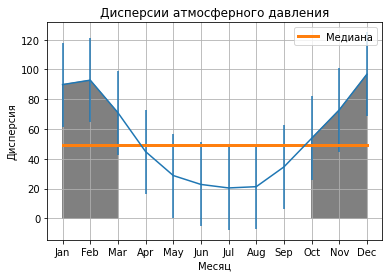

In [42]:
# дисперсии атмосферного давления
plt.xticks(month_range, cal.month_abbr[1:13])
plt.grid()
plt.xlabel("Месяц")

# отображение планок погрешностей с использованием стандартного отклонения
plt.errorbar(month_range, vars, yerr=vars.std())
plt.plot(month_range, np.full_like(month_range, np.median(vars)), lw=3, label="Медиана")

# закрасить область выше медианы
plt.fill_between(month_range, vars, where=vars>np.median(vars), color='0.5')
plt.title("Дисперсии атмосферного давления")
plt.ylabel("Дисперсия")
plt.legend(loc='best')

Мы сопоставили месяцы с измерениями атмосферного давления. Мы использовали совпадения, чтобы нарисовать диаграммы размаха и визуализировать месячную дисперсию. Это исследование показывает, что отклонение атмосферного давления выше медианного значения в самые холодные месяцы — январь, февраль, ноябрь и декабрь. Из графиков видно, что диапазоны давлений сужаются в тёплые летние месяцы. Это согласуется с полученными ранее результатами.

---

Выбросы представляют собой проблему, потому что они влияют на наше понимание данных. Давайте посчитаем выбросы для каждого месяца в году.

In [43]:
# получить средние значения атмосферного давления
meanp = np.array([K * rec[header.index("PG")] for rec in data])

In [44]:
# отфильтровать нулевые значения (с помощью маскированных массивов NumPy)
meanp = np.ma.array(meanp, mask=(meanp == 0))

In [45]:
# вычислить квартили и межквартильный размах
q1 = np.percentile(meanp, 25)
median = np.percentile(meanp, 50)
q3 = np.percentile(meanp, 75)

iqr = q3 - q1

In [46]:
# получить статистику по месяцам
dates = np.array([rec[header.index("YYYYMMDD")] for rec in data])
months = (dates % 10000) // 100

m_low = np.zeros(12)
m_high = np.zeros(12)
month_range = np.arange(1, 13)

# подсчитать количество выбросов
for month in month_range:
    indices = np.where(month == months)
    selection = meanp[indices]
    m_low[month - 1] = len(selection[selection < (q1 - 1.5 * iqr)])
    m_high[month - 1] = len(selection[selection > (q3 + 1.5 * iqr)])

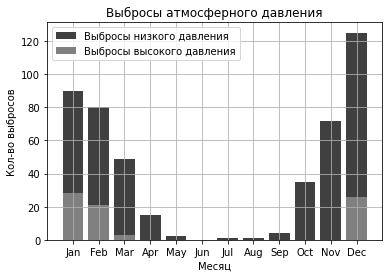

In [47]:
# выбросы атмосферного давления
plt.xticks(month_range, cal.month_abbr[1:13])
plt.bar(month_range, m_low, label="Выбросы низкого давления", color='0.25')
plt.bar(month_range, m_high, label="Выбросы высокого давления", color='0.5')
plt.title("Выбросы атмосферного давления")
plt.xlabel("Месяц")
plt.ylabel("Кол-во выбросов")
plt.grid()
plt.legend(loc='best')

Похоже, что выбросы в основном находятся в области низкого давления, и летом они менее вероятны.
Выбросы в области высокого давления, кажется, возникают только в определённые месяцы.